In [1]:
from sklearn import mixture
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
%matplotlib inline

In [2]:
X = np.zeros((0, 7))
filenames = []

num_components = 0
paths = []
foldername = "/root/catkin_ws/src/jiaming_manipulation/task_planner/gmm/empty_world_trajectory_data/env_000000/"
filenames = sorted(glob.glob("%s/*.p"%foldername))
# filenames

In [3]:
# Create paths from trajectory data
for idx, filename in enumerate(filenames[::3]):
    if idx > 0 and idx%500 == 0:
        print(idx)
    with open(filename, "rb") as f:
        path = pickle.load(f, encoding="latin1")['path']
#         path = pickle.load(f)['path']
        paths.append(path)
        path_len = path.shape[0]
        if path_len > num_components:
            num_components = path_len
        X = np.append(X, path, axis=0)


500
1000
1500
2000
2500
3000


In [4]:
gmm = mixture.GaussianMixture(n_components=num_components * 10, random_state=0, n_init = 5, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 326.10800s	 ll change 0.44743
  Iteration 20	 time lapse 248.72279s	 ll change 0.29396
  Iteration 30	 time lapse 240.48652s	 ll change 0.15106
  Iteration 40	 time lapse 237.81792s	 ll change 0.07994
  Iteration 50	 time lapse 234.99716s	 ll change 0.01938
  Iteration 60	 time lapse 235.52366s	 ll change 0.01726
  Iteration 70	 time lapse 233.06404s	 ll change 0.01519
Initialization converged: True	 time lapse 1920.03575s	 ll 5.12550
Initialization 1
  Iteration 10	 time lapse 311.88080s	 ll change 0.49500
  Iteration 20	 time lapse 244.03173s	 ll change 0.27744
  Iteration 30	 time lapse 238.70759s	 ll change 0.11770
  Iteration 40	 time lapse 237.60325s	 ll change 0.09691
  Iteration 50	 time lapse 235.66145s	 ll change 0.04497
  Iteration 60	 time lapse 233.56275s	 ll change 0.01573
  Iteration 70	 time lapse 234.82835s	 ll change 0.00594
  Iteration 80	 time lapse 240.47429s	 ll change 0.00381
  Iteration 90	 time lapse 234.60228s	 ll ch

In [ ]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path[:, :2])
    if idx%100 == 0:
        print(predicted_distributions)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])


In [ ]:
X.shape

In [ ]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 10, random_state=1, verbose=1, n_init = 5).fit(X)

In [ ]:
dpgmm.converged_

In [ ]:
num_components

In [5]:
gmm_name = 'gmm/'

import os
if not os.path.exists(gmm_name):
    os.makedirs(gmm_name)

np.save(gmm_name + 'weights', gmm.weights_, allow_pickle=False)
np.save(gmm_name + 'means', gmm.means_, allow_pickle=False)
np.save(gmm_name + 'covariances', gmm.covariances_, allow_pickle=False)



In [6]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("gmm/edges.npy", unique)
np.save("gmm/edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
3000


In [7]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 10, random_state=1, verbose=2, n_init = 5).fit(X)

Initialization 0
  Iteration 10	 time lapse 317.59223s	 ll change 4886.17331
  Iteration 20	 time lapse 259.38825s	 ll change 1959.66543
  Iteration 30	 time lapse 258.33546s	 ll change 1524.76516
  Iteration 40	 time lapse 258.29751s	 ll change 822.61138
  Iteration 50	 time lapse 259.13216s	 ll change 822.23246
  Iteration 60	 time lapse 257.67887s	 ll change 519.54664
  Iteration 70	 time lapse 256.02868s	 ll change 279.98679
  Iteration 80	 time lapse 260.96054s	 ll change 162.21780
  Iteration 90	 time lapse 255.75698s	 ll change 314.33205
  Iteration 100	 time lapse 256.44075s	 ll change 191.48644
Initialization converged: False	 time lapse 2639.61149s	 ll -487956.87965
Initialization 1
  Iteration 10	 time lapse 317.12407s	 ll change 5042.97374
  Iteration 20	 time lapse 255.74605s	 ll change 2180.00827
  Iteration 30	 time lapse 260.30126s	 ll change 1149.90569
  Iteration 40	 time lapse 260.97329s	 ll change 1050.08281
  Iteration 50	 time lapse 256.46462s	 ll change 538.79580

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [9]:
dpgmm_name = 'dpgmm/'

import os
if not os.path.exists(dpgmm_name):
    os.makedirs(dpgmm_name)

np.save(dpgmm_name + 'weights', dpgmm.weights_, allow_pickle=False)
np.save(dpgmm_name + 'means', dpgmm.means_, allow_pickle=False)
np.save(dpgmm_name + 'covariances', dpgmm.covariances_, allow_pickle=False)

edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = dpgmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("dpgmm/edges.npy", unique)
np.save("dpgmm/edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
3000


In [ ]:
from sklearn.datasets import make_blobs
X_tmp, y_tmp = make_blobs(n_samples=350, centers=10, cluster_std=0.60)
# plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
print(X_tmp.shape, y_tmp.shape)

In [ ]:
bay_gmm = mixture.BayesianGaussianMixture(n_components=100, n_init=10)


bay_gmm.fit(X)

In [ ]:
plt.plot(bay_gmm.weights_)

In [ ]:
dpgmm_w = bay_gmm.weights_
np.sort(dpgmm_w)

In [ ]:
gmm = mixture.GaussianMixture(n_components=100, random_state=0).fit(X)
plt.plot(gmm.weights_)

In [10]:

def plot_results(X, Y_, means, covariances, index, title, plot_gmm = True):
    plt.figure(figsize=(15,25))
    splot = plt.subplot(3, 1, 1 + index)
    color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
    if plot_gmm:
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
#             print(Y_)
            if not np.any(Y_ == i):
                continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    else:
        plt.scatter(X[:, 0], X[:, 1], 0.8, color="c")
        

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

In [ ]:
X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=25, covariance_type="full", n_init = 5).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# plt.show()
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=25, covariance_type="full", n_init = 5).fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Data",
    False
)
plt.show()

In [12]:
from sklearn.decomposition import PCA


(195869, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


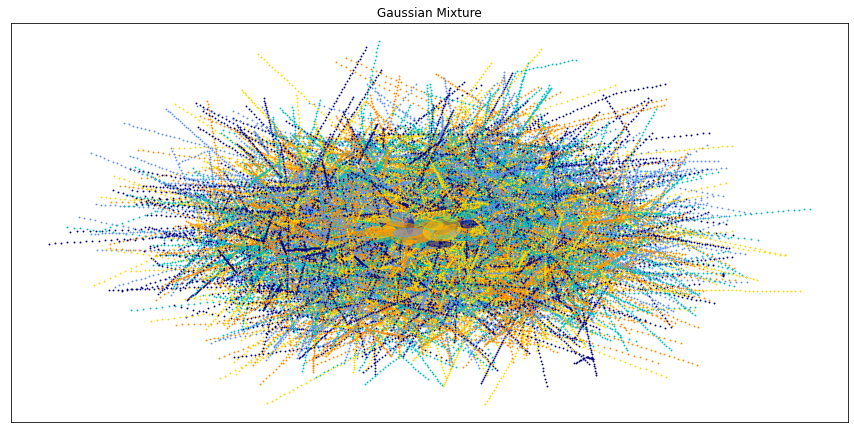

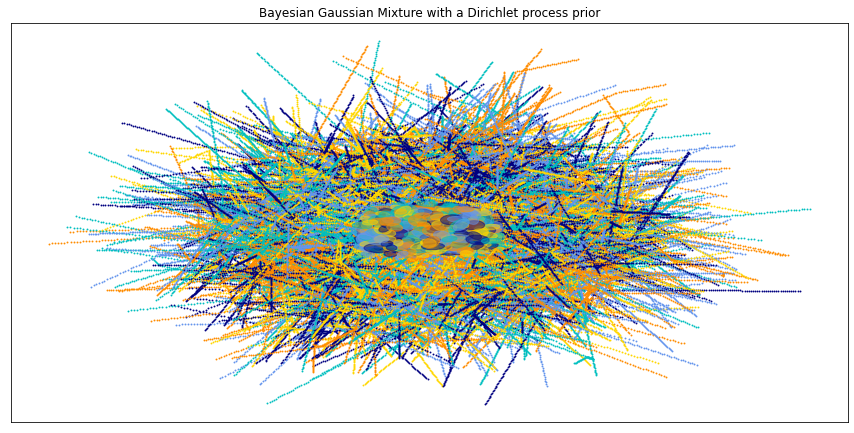

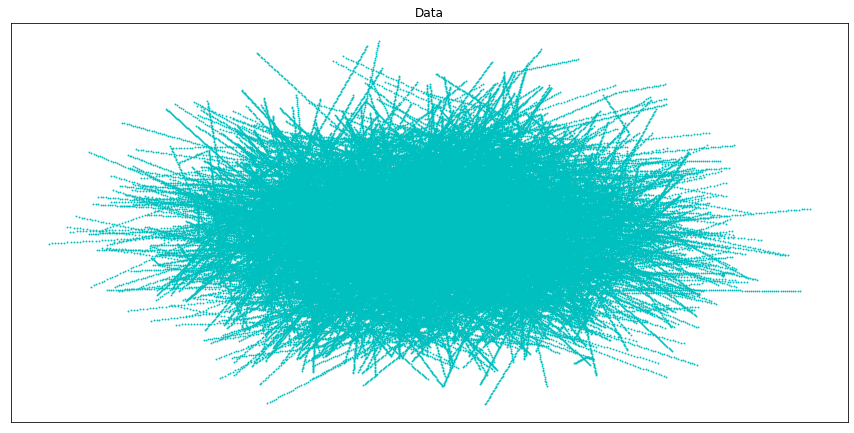

In [15]:
X_pca = PCA(n_components=2).fit_transform(X)
print(X_pca.shape)
plot_results(X_pca[::2], gmm_predicted[::2], gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # Fit a Dirichlet process Gaussian mixture using five components
plot_results(
    X_pca,
    dpgmm_predicted,
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# # plt.show()
# # plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Data",
    False
)
plt.show()

In [14]:
gmm_predicted = gmm.predict(X)
dpgmm_predicted = dpgmm.predict(X)

In [ ]:
X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)
X_temp.sahape

In [ ]:
plt.hist(dpgmm.weights_, bins = 100)